# HOUSE PRICE PREDICTION USING RANDOM FOREST REGRESSOR AND LINEAR REGRESSION MODEL

# by ASHOK KUMAR GUAL

# Importing all the libraries and module

In [447]:
import numpy as np 
import pandas as pd 
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

# loading the data set

In [448]:
housedata = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/house_data.csv")
housedata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Description of each Features

Data fields
Here's a brief version of what you'll find in the data description file.

SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.

MSSubClass: The building class

MSZoning: The general zoning classification

LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access

Alley: Type of alley access

LotShape: General shape of property

LandContour: Flatness of the property

Utilities: Type of utilities available

LotConfig: Lot configuration

LandSlope: Slope of property

Neighborhood: Physical locations within Ames city limits

Condition1: Proximity to main road or railroad

Condition2: Proximity to main road or railroad (if a second is present)

BldgType: Type of dwelling

HouseStyle: Style of dwelling

OverallQual: Overall material and finish quality

OverallCond: Overall condition rating

YearBuilt: Original construction date

YearRemodAdd: Remodel date

RoofStyle: Type of roof

RoofMatl: Roof material

Exterior1st: Exterior covering on house

Exterior2nd: Exterior covering on house (if more than one material)

MasVnrType: Masonry veneer type

MasVnrArea: Masonry veneer area in square feet

ExterQual: Exterior material quality

ExterCond: Present condition of the material on the exterior

Foundation: Type of foundation

BsmtQual: Height of the basement

BsmtCond: General condition of the basement

BsmtExposure: Walkout or garden level basement walls

BsmtFinType1: Quality of basement finished area

BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Quality of second finished area (if present)

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating

HeatingQC: Heating quality and condition

CentralAir: Central air conditioning

Electrical: Electrical system

1stFlrSF: First Floor square feet

2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Number of bedrooms above basement level

Kitchen: Number of kitchens

KitchenQual: Kitchen quality

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality rating

Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

GarageType: Garage location

GarageYrBlt: Year garage was built

GarageFinish: Interior finish of the garage

GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

GarageCond: Garage condition

PavedDrive: Paved driveway

WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality

Fence: Fence quality

MiscFeature: Miscellaneous feature not covered in other categories

MiscVal: $Value of miscellaneous feature

MoSold: Month Sold

YrSold: Year Sold

SaleType: Type of sale

SaleCondition: Condition of sale


# shape of data

In [449]:
print('Shape of data set is : ',housedata.shape)
housedata.columns

Shape of data set is :  (1460, 81)


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# info of data

In [450]:
housedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

# description of data

In [451]:
housedata.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# finding out numerical and object data types

In [452]:
categorical=housedata.select_dtypes(include=['object']).columns
categorical

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [453]:
numerical=housedata.select_dtypes(include=['float64','int64']).columns
numerical

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

# Analysis of the test variable 

check sales price

In [454]:
housedata['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [455]:
from scipy import stats
# Get the fitted parameters used by the function

(mu, sigma) = stats.norm.fit(housedata['SalePrice'])
print('\n mu={:.2f} and sigma={:.2f}\n'.format(mu, sigma))


 mu=180921.20 and sigma=79415.29



Text(0.5, 1.0, 'SalePrice distribution')

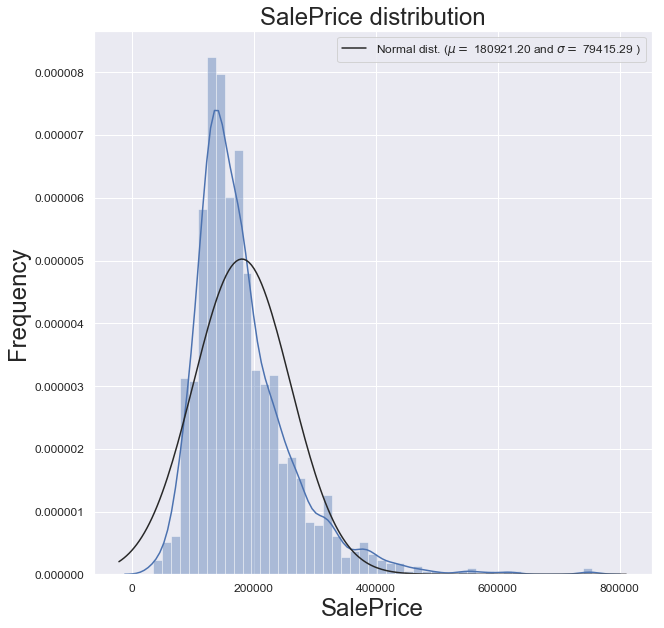

In [456]:
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 
plt.figure(figsize=(10,10))

sns.distplot(housedata['SalePrice'] , fit=stats.norm);   
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],fontsize=(12))
            
plt.ylabel('Frequency')
plt.title('SalePrice distribution')



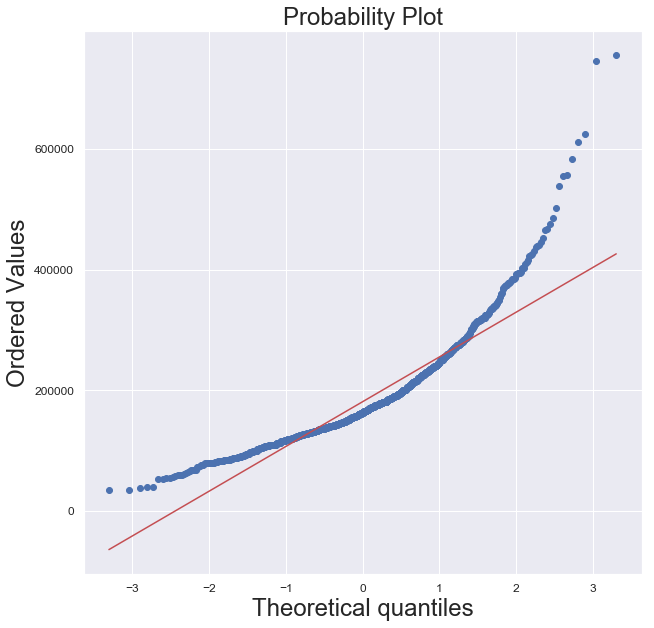

1.8828757597682129
6.536281860064529


In [457]:
fig=plt.figure(figsize=(10,10))
res = stats.probplot(housedata['SalePrice'], plot=plt)
plt.show()
print(housedata['SalePrice'].skew())
print(housedata['SalePrice'].kurt())

Looks like a normal distribution? Not quite! Looking at the kurtosis score, we can see that there is a very nice peak. However, looking at the skewness score, we can see that the sale prices deviate from the normal distribution.

# transforming the salesprice to log of salesprice to make it easier for analysis


 mu = 12.02 and sigma = 0.40



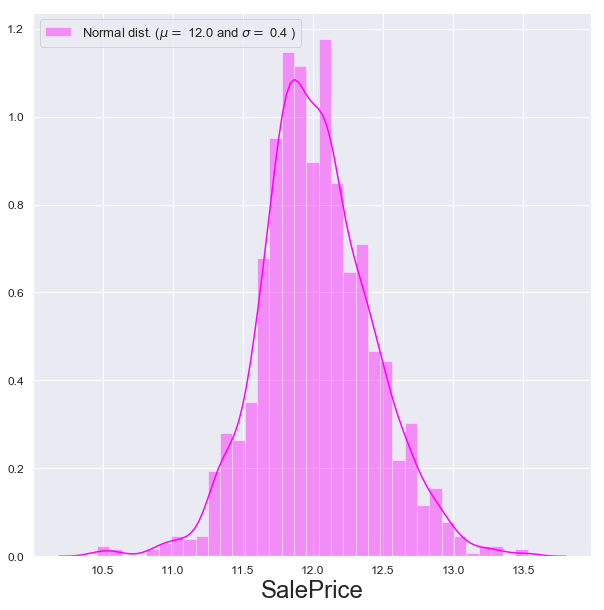

In [458]:
f, ax = plt.subplots(figsize=(10, 10))
sns.distplot(np.log(housedata["SalePrice"]),color='magenta')
(mu, sigma) = stats.norm.fit(np.log(housedata["SalePrice"]))
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.1f} and $\sigma=$ {:.1f} )'.format(mu, sigma)],fontsize=13)

# Data Cleaning

In [459]:
# ID has no impact on saleprice so dropping id from dataset
housedata=housedata.drop(['Id'],axis=1)

In [460]:
housedata.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


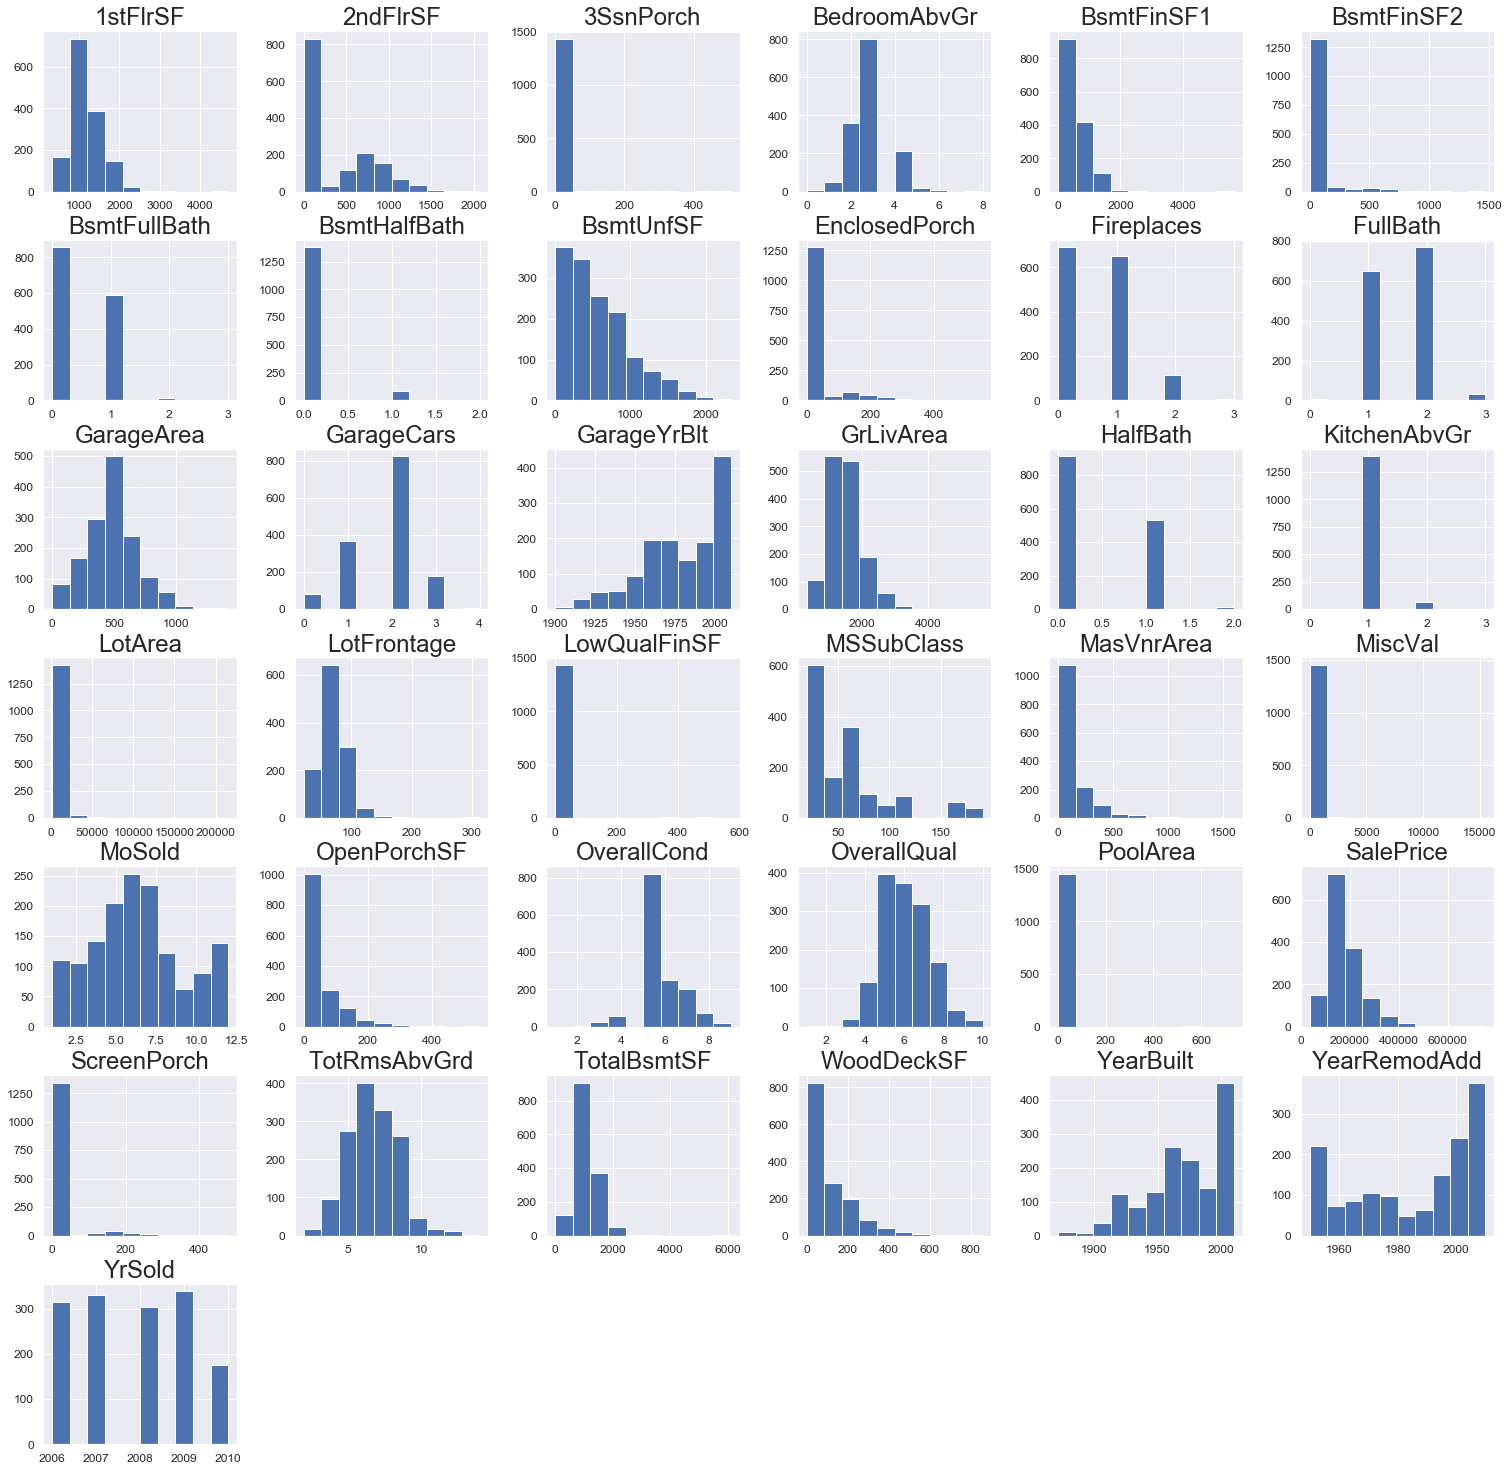

In [461]:
#plot histogram to show the features distribution 
housedata.hist(figsize=(26,26))
plt.show()

checking missing values

In [462]:
missingValues=housedata.isnull().sum()
missingValues

# filter the data where the missing values is more than 1
missingValues=missingValues[missingValues>0]
missingValues

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

arrange the missing values in descending

In [463]:
missingValues.sort_values(inplace=True,ascending=False)

pd.DataFrame({'count': missingValues})


,count
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
LotFrontage,259
GarageYrBlt,81
GarageType,81
GarageFinish,81
GarageQual,81


plot missing values

Text(0.5, 1.0, 'NO OF MISSING DATA FOR EACH FEATURES')

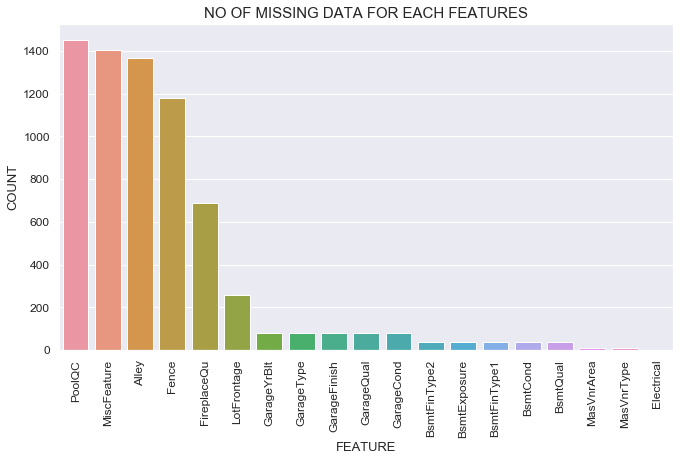

In [464]:

plt.figure(figsize=(11,6))
sns.barplot( x=missingValues.index,y=missingValues)
plt.xlabel('FEATURE',fontsize=13)
plt.ylabel('COUNT',fontsize=13)
plt.xticks(rotation='90')
plt.title('NO OF MISSING DATA FOR EACH FEATURES', fontsize=15)

# imputing missing values

In [465]:
housedata.shape

(1460, 80)

In [466]:
#these data have more missing values so replacing its value with NaN which means NO

housedata["PoolQC"] = housedata.fillna(np.NaN)
housedata["MiscFeature"] = housedata.fillna(np.NaN)
housedata["Alley"] = housedata.fillna(np.NaN)
housedata["Fence"] = housedata.fillna(np.NaN)
housedata["FireplaceQu"] = housedata.fillna(np.NaN)

In [467]:
housedata['LotFrontage']=housedata['LotFrontage'].fillna(housedata['LotFrontage'].median())
housedata['LotFrontage'].isnull().sum()

0

In [468]:
#GarageYrBlt, GarageArea and GarageCars : Replacing missing data with 0

for col in ('GarageYrBlt','GarageArea','GarageCars','BsmtFinSF1', 'BsmtFinSF2', 
            'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath','MasVnrArea'):
    housedata[col]=housedata[col].fillna(0)

In [469]:
#GarageType, GarageFinish, GarageQual and GarageCond : Replacing missing data with "None".
for col in('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','BsmtQual', 'BsmtCond', 
           'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','MasVnrType','MSSubClass'):
    housedata[col] = housedata[col].fillna('None')

In [470]:
housedata["Functional"] = housedata["Functional"].fillna("Typ")
housedata['Electrical'] = housedata['Electrical'].fillna(housedata['Electrical'].mode()[0])
housedata['KitchenQual'] = housedata['KitchenQual'].fillna(housedata['KitchenQual'].mode()[0])
housedata['Exterior1st'] = housedata['Exterior1st'].fillna(housedata['Exterior1st'].mode()[0])
housedata['Exterior2nd'] = housedata['Exterior2nd'].fillna(housedata['Exterior2nd'].mode()[0])

# now checking the missing values in data set

In [471]:
missingValues=housedata.isnull().sum()
missingValues
missingValues.sort_values(inplace=True,ascending=False)

pd.DataFrame({'count': missingValues})


,count
SalePrice,0
SaleCondition,0
RoofMatl,0
Exterior1st,0
Exterior2nd,0
MasVnrType,0
MasVnrArea,0
ExterQual,0
ExterCond,0
Foundation,0


# Feature Selection - Correlation of independent variable with Target Variable

In [472]:
correlation=housedata.corr()
corr=correlation['SalePrice'].sort_values(ascending=False)
corr

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.334771
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
GarageYrBlt      0.261366
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

from the above overalQual,GrLiveArea,GarageCars,GarageArea,totalBsmtSF,1stFlrSF,FullBath,TotalRmsAbvGrd,YearBuilt,
YearRemodeAdd are the highest influencer features for salesprice

KitchenAnvGr,EnclosedPorch,MS,SubClass,OveralCond, MiscVal are the least influencer to SalesPrice and can be excluded.


# Selecting first 15 highest correlated feature

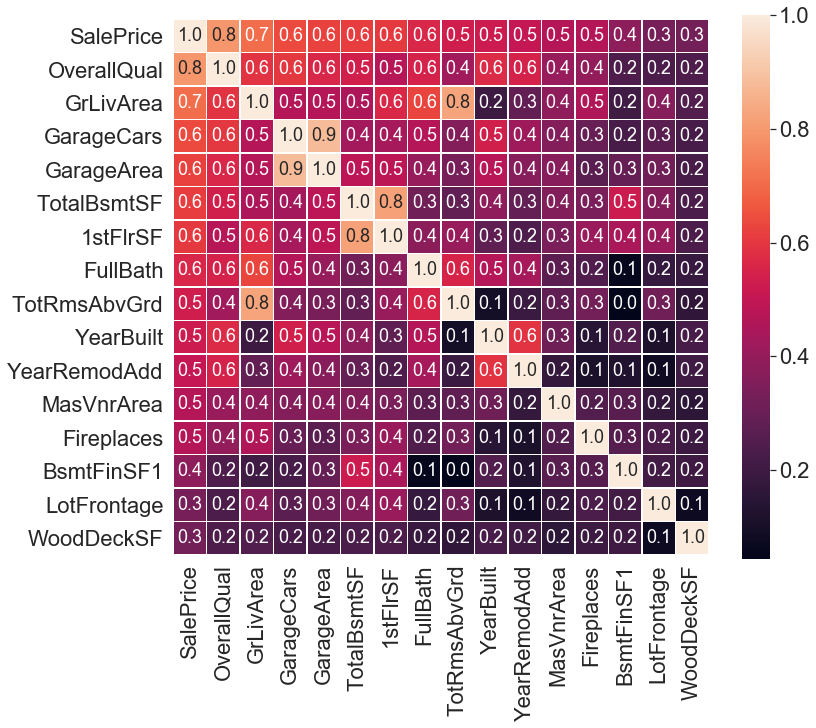

In [473]:
k = 16 #number of variables for heatmap
cormat=housedata.corr()
cols = cormat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(housedata[cols].values.T)

plt.figure(figsize=(12,10))
sns.set(font_scale=2.00)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.1f', annot_kws={'size': 18},
                 yticklabels=cols.values, xticklabels=cols.values,linewidths=.30)

plt.show()

# top15 feature list influencing house price 

In [474]:
Features=cormat.nlargest(k, 'SalePrice')['SalePrice'].index
Features

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1', 'LotFrontage',
       'WoodDeckSF'],
      dtype='object')

#  model implementation based on 15 Variable

# Create a data frame of 15 independent variable for model evaluation

In [475]:
# create a dataframe of 15 highly impacting features on saleprice
data = pd.DataFrame([housedata['OverallQual'],housedata['GrLivArea'],housedata['GarageCars'],housedata['GarageArea'],
                      housedata['TotalBsmtSF'],housedata['1stFlrSF'],housedata['FullBath'],housedata['TotRmsAbvGrd'],
                      housedata['YearBuilt'],housedata['YearRemodAdd'],housedata['MasVnrArea'],housedata['Fireplaces'],
                     housedata['BsmtFinSF1'],housedata['LotFrontage'],housedata['WoodDeckSF'],housedata['SalePrice']])

data=data.transpose()
data.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea,Fireplaces,BsmtFinSF1,LotFrontage,WoodDeckSF,SalePrice
0,7.0,1710.0,2.0,548.0,856.0,856.0,2.0,8.0,2003.0,2003.0,196.0,0.0,706.0,65.0,0.0,208500.0
1,6.0,1262.0,2.0,460.0,1262.0,1262.0,2.0,6.0,1976.0,1976.0,0.0,1.0,978.0,80.0,298.0,181500.0
2,7.0,1786.0,2.0,608.0,920.0,920.0,2.0,6.0,2001.0,2002.0,162.0,1.0,486.0,68.0,0.0,223500.0
3,7.0,1717.0,3.0,642.0,756.0,961.0,1.0,7.0,1915.0,1970.0,0.0,1.0,216.0,60.0,0.0,140000.0
4,8.0,2198.0,3.0,836.0,1145.0,1145.0,2.0,9.0,2000.0,2000.0,350.0,1.0,655.0,84.0,192.0,250000.0


# Standardisation of data

In [476]:
scaler=StandardScaler().fit(data)

data1=scaler.transform(data)
data=pd.DataFrame(data1)
data.head()
data.columns=['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd',
             'YearBuilt','YearRemodAdd','MasVnrArea','Fireplaces','BsmtFinSF1','LotFrontage','WoodDeckSF','SalePrice']

data.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea,Fireplaces,BsmtFinSF1,LotFrontage,WoodDeckSF,SalePrice
0,0.651479,0.370333,0.311725,0.351000,-0.459303,-0.793434,0.789741,0.912210,1.050994,0.878668,0.514104,-0.951226,0.575425,-0.220875,-0.752176,0.347273
1,-0.071836,-0.482512,0.311725,-0.060731,0.466465,0.257140,0.789741,-0.318683,0.156734,-0.429577,-0.570750,0.600495,1.171992,0.460320,1.626195,0.007288
2,0.651479,0.515013,0.311725,0.631726,-0.313369,-0.627826,0.789741,-0.318683,0.984752,0.830215,0.325915,0.600495,0.092907,-0.084636,-0.752176,0.536154
3,0.651479,0.383659,1.650307,0.790804,-0.687324,-0.521734,-1.026041,0.296763,-1.863632,-0.720298,-0.570750,0.600495,-0.499274,-0.447940,-0.752176,-0.515281
4,1.374795,1.299326,1.650307,1.698485,0.199680,-0.045611,0.789741,1.527656,0.951632,0.733308,1.366489,0.600495,0.463568,0.641972,0.780197,0.869843


# choosing X_Train(independent Feature),Y_Train(target variable) features from data set

In [477]:
Y_Train=data[['SalePrice']]
X_Train=data.drop(['SalePrice'], axis=1)


# spliting the data into train & test data

In [478]:
from sklearn.model_selection import train_test_split
X_Train,X_Test,Y_Train,Y_Test=train_test_split(X_Train,Y_Train,test_size=0.30,random_state=1)

# Linear Regression model implimentation

In [479]:
LinearReg=LinearRegression()
LinearReg.fit(X_Train,Y_Train)

#predicting the test set results 
LinearReg_Y_pred = LinearReg.predict(X_Test) 



In [480]:
print("Intercept", LinearReg.intercept_)
print("Coefficient", LinearReg.coef_)


Intercept [-0.0092752]
Coefficient [[ 0.3265184   0.15618835  0.13203237  0.01308083  0.057705    0.04544825
   0.01257404  0.08205165  0.04999537  0.09382577  0.06801808  0.07906126
   0.08024024 -0.00937706  0.05987194]]


calculating the r squared value

In [481]:
#calculating the r squared value
LinearReg15_r2=r2_score(Y_Test,LinearReg_Y_pred)
print('Linenear Regression r2 score using 15 feature is : ', LinearReg15_r2)

Linenear Regression r2 score using 15 feature is :  0.8311073989493499


calculating  Mean Absolute Error

In [482]:
from sklearn.metrics import mean_absolute_error
MAE_LinearReg15=mean_absolute_error(Y_Test, LinearReg_Y_pred)
print('Mean absolute error of linear regression model using 15 feature is:',MAE_LinearReg15)

Mean absolute error of linear regression model using 15 feature is: 0.29673733158580273


calculating mean squared error

In [483]:
mse_linearReg15=mean_squared_error(Y_Test,LinearReg_Y_pred)
print('mean squared error of linear regression model using 15 feature is:', mse_linearReg15)

mean squared error of linear regression model using 15 feature is: 0.19121368977109815


calculating accuracy of linear regression model

In [484]:
LinearReg_accuracy15=LinearReg.score(X_Test,Y_Test)*100
print('accuarcy of linear regression model using 15 independent variable is:',LinearReg_accuracy15)

accuarcy of linear regression model using 15 independent variable is: 83.11073989493498


# Random Forest Regressor Model using 15 variable

# Random forest regressor model implementation

In [485]:
rf_model15=RandomForestRegressor(n_estimators =90, random_state = 1)
rf_model15.fit(X_Train,Y_Train)
rf_model_pred15=rf_model15.predict(X_Test)

C:\Users\ab68523\annaconda\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


calculating r squared value

In [486]:

RandomForestReg15_r2=r2_score(Y_Test,rf_model_pred15)
print('r squared value of random forest regressor model using 15 variable is:',RandomForestReg15_r2)

r squared value of random forest regressor model using 15 variable is: 0.8806086169890237


calculating MAE

In [487]:
MAE_Random15=mean_absolute_error(Y_Test,rf_model_pred15)
print('mean absolute error of random forest regressor using 15 variable is:',MAE_Random15)

mean absolute error of random forest regressor using 15 variable is: 0.2306876946483513


calculating MSE

In [488]:
MSE_Random15=mean_squared_error(Y_Test,rf_model_pred15)
print('mean squared error of random forest regressor using 15 variable is:',MSE_Random15)

mean squared error of random forest regressor using 15 variable is: 0.13517031966105367


calculating Random forest Regressor accuracy

In [489]:
RandomReg_accuracy15=rf_model15.score(X_Test,Y_Test)*100
print('accuarcy of linear regression model using 15 independent variable is:',RandomReg_accuracy15)

accuarcy of linear regression model using 15 independent variable is: 88.06086169890237


# Implimentation of Model Using 10 highly imapcted feature 

In [490]:
data10=pd.DataFrame([housedata['OverallQual'],housedata['GrLivArea'],housedata['GarageCars'],housedata['GarageArea'],
                      housedata['TotalBsmtSF'],housedata['1stFlrSF'],housedata['FullBath'],housedata['TotRmsAbvGrd'],
                      housedata['YearBuilt'],housedata['YearRemodAdd'],housedata['SalePrice']])
data10=data10.T
data10.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice
0,7,1710,2,548,856,856,2,8,2003,2003,208500
1,6,1262,2,460,1262,1262,2,6,1976,1976,181500
2,7,1786,2,608,920,920,2,6,2001,2002,223500
3,7,1717,3,642,756,961,1,7,1915,1970,140000
4,8,2198,3,836,1145,1145,2,9,2000,2000,250000


# Standardisation of Data

In [491]:
#Standardisation of data
scaler1=StandardScaler().fit(data10)

data11=scaler1.transform(data10)
data10=pd.DataFrame(data11)
data10.columns=['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd',
             'YearBuilt','YearRemodAdd','SalePrice']
data10.head()

C:\Users\ab68523\annaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ab68523\annaconda\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice
0,0.651479,0.370333,0.311725,0.351000,-0.459303,-0.793434,0.789741,0.912210,1.050994,0.878668,0.347273
1,-0.071836,-0.482512,0.311725,-0.060731,0.466465,0.257140,0.789741,-0.318683,0.156734,-0.429577,0.007288
2,0.651479,0.515013,0.311725,0.631726,-0.313369,-0.627826,0.789741,-0.318683,0.984752,0.830215,0.536154
3,0.651479,0.383659,1.650307,0.790804,-0.687324,-0.521734,-1.026041,0.296763,-1.863632,-0.720298,-0.515281
4,1.374795,1.299326,1.650307,1.698485,0.199680,-0.045611,0.789741,1.527656,0.951632,0.733308,0.869843


# choosing target & independent variable

In [492]:
y_train=data10[['SalePrice']]
x_train=data10.drop(['SalePrice'],axis=1)

# splitting the data in to train & test and its evaluation

In [493]:
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.30,random_state=1)

# Linear Regression Model based on 10 features

In [494]:
# Model evaluation
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

# predicting the sales value
LinearReg_y_pred = reg.predict(x_test) 

calculating the r squared value

In [495]:

LinearReg10_r2=r2_score(y_test,LinearReg_y_pred)
print('Linenear Regression r2 score using 10 feature is : ', LinearReg10_r2)

Linenear Regression r2 score using 10 feature is :  0.8190294829326764


calculating MAE 

In [496]:

MAE_10=mean_absolute_error(y_test,LinearReg_y_pred)
print('MAE using 10 feature is : ', MAE_10)

MAE using 10 feature is :  0.3066258707106152


calculating MSE

In [497]:
MSE_10=mean_squared_error(y_test,LinearReg_y_pred)
print('MSE using 10 feature is : ', MSE_10)

MSE using 10 feature is :  0.20488784051498407


calculating accuracy of linear regression model 

In [498]:
LinearReg_accuracy10=reg.score(x_test,y_test)*100
print('accuarcy of linear regression model using 10 independent variable is:',LinearReg_accuracy10)

accuarcy of linear regression model using 10 independent variable is: 81.90294829326764


# Random Forest Regressor Model using 10 variable

In [499]:
rf_model10=RandomForestRegressor(n_estimators =100, random_state = 1)
rf_model10.fit(x_train,y_train)
rf_model_pred10=rf_model10.predict(x_test)


C:\Users\ab68523\annaconda\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


calculating the r squared value

In [500]:
r2_random10=r2_score(y_test,rf_model_pred10)
print('r squared score of random forest regressor model using 10 variable :',r2_random10)

r squared score of random forest regressor model using 10 variable : 0.8892124771218055


calculating the MAE

In [501]:
MAERandom10=mean_absolute_error(y_test,rf_model_pred10)
print('MAE score of random forest regressor model using 10 variable :',MAERandom10)

MAE score of random forest regressor model using 10 variable : 0.2529998137612314


calculating MSE

In [502]:
MSERandom10=mean_squared_error(y_test,rf_model_pred10)
print('MSE score of random forest regressor model using 10 variable :',MSERandom10)

MSE score of random forest regressor model using 10 variable : 0.12542936101615554


calculating accuracy of random forest regressor model 

In [503]:
Random_accuracy10=rf_model10.score(x_test,y_test)*100
print('accuarcy of Random Forest Regressor model using 10 independent variable is:',Random_accuracy10)

accuarcy of Random Forest Regressor model using 10 independent variable is: 88.92124771218054


# Bar plot to see LiniearRegressionModel with 15 and 10 independent variables 

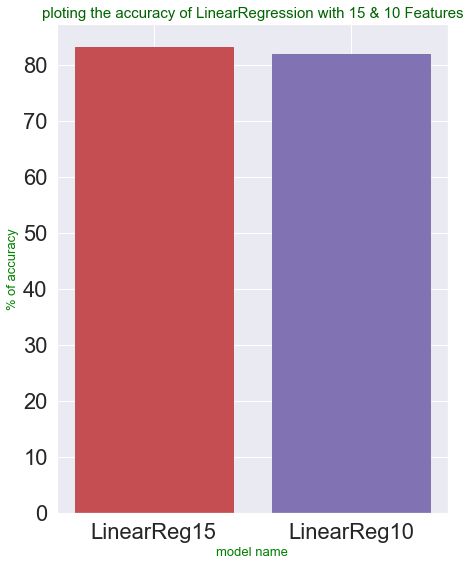

In [504]:

model='LinearReg15','LinearReg10'
label=[LinearReg.score(X_Test,Y_Test)*100,reg.score(x_test,y_test)*100]
plt.figure(figsize=(7,9))
bar=plt.bar(model,label, linewidth=1.0)
plt.title('ploting the accuracy of LinearRegression with 15 & 10 Features',color='DarkGreen',fontsize=(15))
plt.ylabel('% of accuracy',color='green',fontsize=(13))
plt.xlabel('model name',color='green',fontsize=(13))
bar[0].set_color('r')
bar[1].set_color('m')


plt.show()


From the above evaluation it is clear that Linear regression model using 15 independent variable has more accuracy
on predicting sale price of House than the Linear Regression model using 10 independent variable. So we should consider 
the 15 highly impacting independent variable to predict the house sale price

# Plot pie chart to see the accuracy rate of RandomForestRegressor model using 15 & 10 independent variable

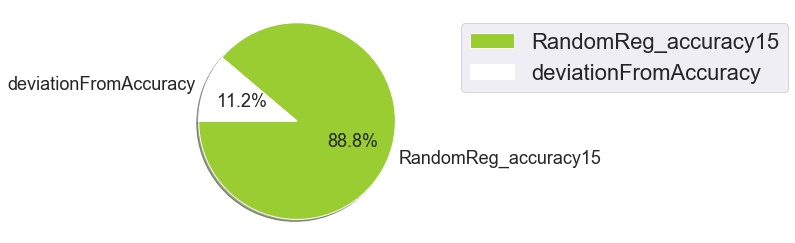

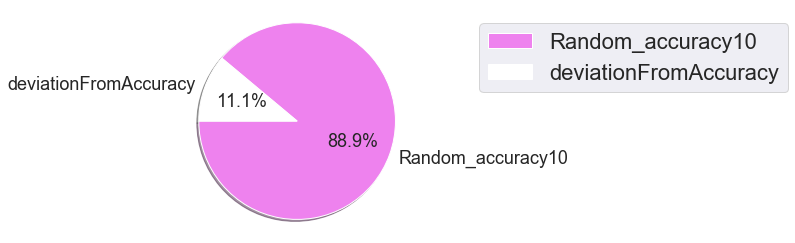

In [505]:
labels=['RandomReg_accuracy15','deviationFromAccuracy']
sizes=[rf_model15.score(X_Test,Y_Test)*100,100-rf_model10.score(x_test,y_test)*100]
explode = (0,0)
colors = ['yellowgreen', 'white']
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True,textprops={'fontsize': 18}, startangle=180)
plt.axis('equal')
plt.legend(bbox_to_anchor=(2,1))
plt.show()

labels=['Random_accuracy10','deviationFromAccuracy']
sizes=[rf_model10.score(x_test,y_test)*100,100-rf_model10.score(x_test,y_test)*100]
explode = (0,0)
colors = ['violet', 'white']
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True,textprops={'fontsize': 18}, startangle=180)
plt.axis('equal')
plt.legend(bbox_to_anchor=(2,1))
plt.show()

# Conclusion

If we compare Linear Regression model and random forest regressor model using 15 & 10 independent variable,
Random forest model has higher accuracy and consistency. Hence we should choose random forest regressor model for house price prediction